# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd 

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url , sep= ',')

### Step 4.  Check out the type of the columns

In [4]:
print(apple.columns.dtype)

object


### Step 5. Transform the Date column as a datetime type

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])

print(apple['Date'].dtype)

datetime64[ns]


### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [7]:
dublicates = apple[apple.duplicated(keep=False)]
dublicates

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


In [8]:
# then there is no duplicated dates

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [9]:
apple = apple.sort_index(ascending=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [10]:
last_business_days = apple.resample('BM').last()
last_business_days

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [11]:
(apple.index[0] - apple.index[-1]).days

-12261

### Step 11.  How many months in the data we have?

In [31]:
apple.index.month.value_counts().count()

12

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

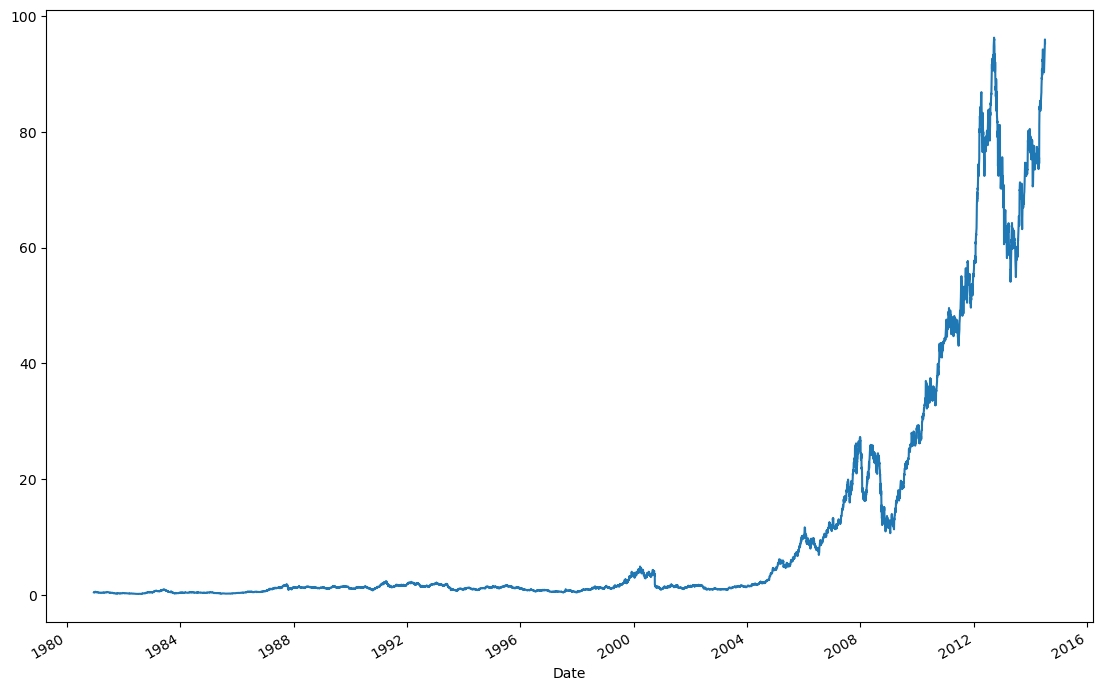

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))

apple['Adj Close'].plot()

plt.show()

### BONUS: Create your own question and answer it.

In [36]:
# what is the top 5 highest volume days in the Apple stock dataset?

apple.sort_values(by='Volume', ascending=False).head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-09-29,28.19,29.00,25.38,25.75,1855410200,1.76
1997-08-06,25.25,27.75,25.00,26.31,1047620000,0.90
1997-08-07,28.75,29.56,28.37,29.19,938859600,1.00
2008-01-23,136.19,140.00,126.14,139.07,843242400,18.99
1999-09-21,73.19,73.25,69.00,69.25,839389600,2.36
